In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [51]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [52]:
# View all of the classes that automap found
all_classes = Base.classes
for table_name in all_classes.keys():
    print(table_name)

station
measurement


In [53]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [54]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [55]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).scalar()

# Print the most recent date
print(most_recent_date)

2017-08-23


In [64]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(func.max(measurement.date)).scalar()
# Calculate the date one year from the last date in data set.
one_year_ago = (pd.to_datetime(most_recent_date) - pd.DateOffset(days=365)).strftime('%Y-%m-%d')


# Perform a query to retrieve the data and precipitation scores
last_12_months_precipitation = session.query(measurement.date, func.sum(measurement.prcp)).\
    filter(measurement.date >= one_year_ago).\
    group_by(measurement.date).\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
values_12m = pd.DataFrame(last_12_months_precipitation, columns=['Date', 'Precipitation'])

values_12m

,Date,Precipitation
0,2016-08-23,2.71
1,2016-08-24,9.33
2,2016-08-25,0.54
3,2016-08-26,0.10
4,2016-08-27,0.32
...,...,...
361,2017-08-19,0.09
362,2017-08-20,0.01
363,2017-08-21,0.58
364,2017-08-22,0.50


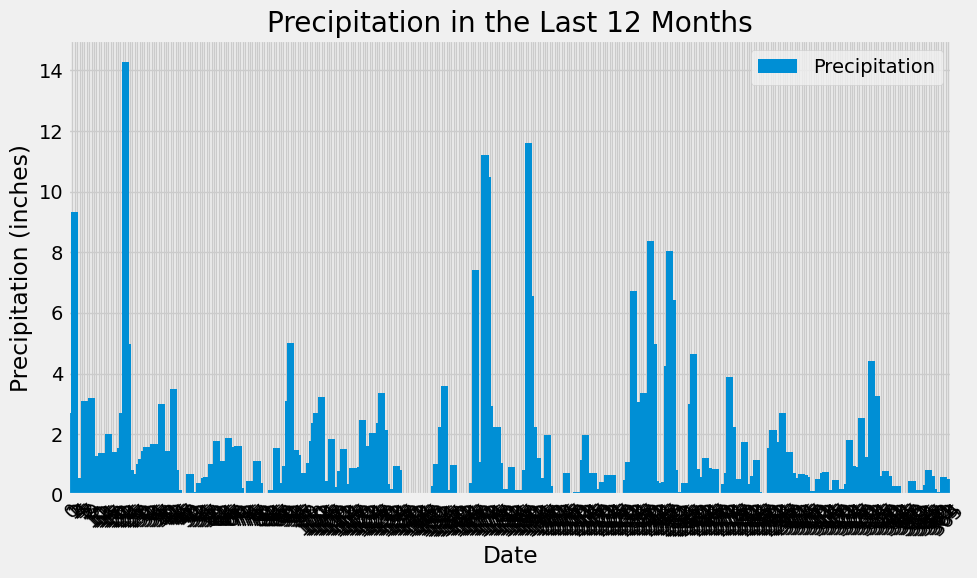

In [65]:
# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
values_12m.plot(kind='bar', width=3, figsize=(10, 6))
plt.title("Precipitation in the last 12 months")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.xticks(rotation, values_12m ['Date'].iloc )
plt.grid 
plt.tight_layout()
plt.show()

In [67]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_stats = values_12m['Precipitation'].describe()
precipitation_stats

count    366.000000
mean       0.978907
std        1.776349
min        0.000000
25%        0.052500
50%        0.405000
75%        1.087500
max       14.280000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [32]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(func.distinct(station.station))).scalar()
total_stations

9

In [40]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
# List the stations and their counts in descending order.

for station, count in active_stations:
    print(f" ID: {station}, {count}")

 ID: USC00519281, 2772
 ID: USC00519397, 2724
 ID: USC00513117, 2709
 ID: USC00519523, 2669
 ID: USC00516128, 2612
 ID: USC00514830, 2202
 ID: USC00511918, 1979
 ID: USC00517948, 1372
 ID: USC00518838, 511


In [44]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_id = 'USC00519281'
temperature_descriptive = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == station_id).all()
lowest_temp, highest_temp, avg_temp = temperature_stats[0]
temperature_descriptive

[(54.0, 85.0, 71.66378066378067)]

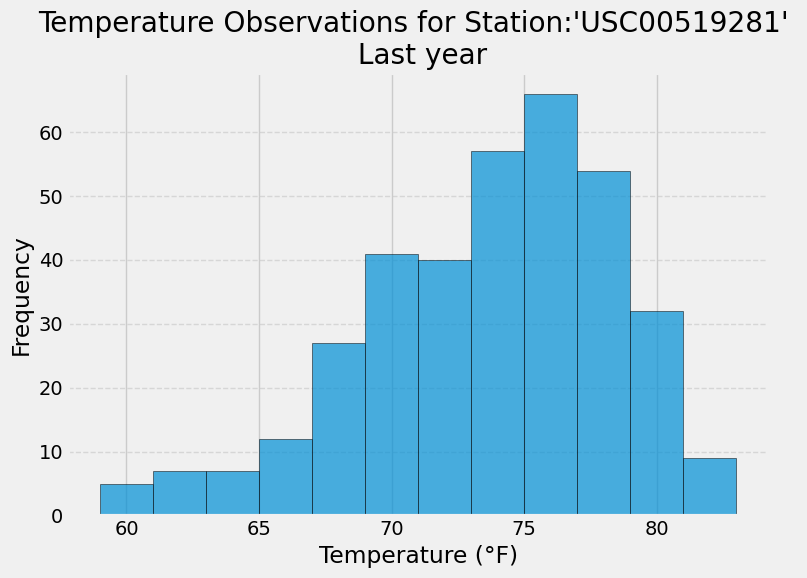

In [60]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_id = 'USC00519281'
most_recent_date = session.query(func.max(measurement.date)).filter(measurement.station == station_id).scalar()
one_year_ago = (pd.to_datetime(most_recent_date) - pd.DateOffset(days=365)).strftime('%Y-%m-%d')

# Query to retrieve temperature observations for the last 12 months for the specified station
temperature_data = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == station_id, measurement.date >= one_year_ago).all()

# Convert the query results into a Pandas DataFrame
temperature_12 = pd.DataFrame(temperature_data, columns=['Date', 'Temperature'])

# Plot the results as a histogram
plt.figure(figsize=(8, 6))
plt.hist(temperature_12['Temperature'], bins=12, edgecolor='k', alpha=0.7)
plt.title("Temperature Observations for Station:'USC00519281' \n Last year")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Close Session

In [49]:
# Close Session
session.close()